In [1]:
from analysis.simulation_results.MF_behaviour import extract_data_MF_glmfit
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
all_coefs = []
alpha = 0.3

In [3]:
for beta in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]:
    data_path = 'analysis/simulation_results/data/MF/alpha{}beta{}/'.format(alpha, beta)
    _, __, ___, glm_result = extract_data_MF_glmfit(data_path)
    all_coefs.append(glm_result)

/home/sahar/Documents/Theory of Mind/Codes/env/lib/python3.8/site-packages/statsmodels/genmod/bayes_mixed_glm.py:792: UserWarning: VB fitting did not converge
  warnings.warn("VB fitting did not converge")


In [4]:
with open('sahar-mixedlm-params-mf.pkl', 'wb') as file:
    pickle.dump(all_coefs, file)

In [5]:
rani_mf = pd.DataFrame({
    'common_reward': [0.2013, 0.5912, 0.7777, 0.6537, 1.0236, 0.9494, 1.1114, 1.1170, 1.1710, 1.2389],
    'unique_reward': [0.3434, 0.6558, 1.0695, 1.0428, 1.2774, 1.3422, 1.5225, 1.6430, 1.5624, 1.6735],
    'interaction': [0.1001, 0.2598, 0.2913, -0.1732, 0.2852, -0.1629, 0.1938, -0.0683, -0.3454, -0.1009]
})

In [6]:
sahar_mf = pd.DataFrame({
    'common_reward': [result.fe_mean[1] for result in all_coefs],
    'unique_reward': [result.fe_mean[2] for result in all_coefs],
    'interaction': [result.fe_mean[3] for result in all_coefs]
})

Text(0, 0.5, 'MF coefficients - Rani')

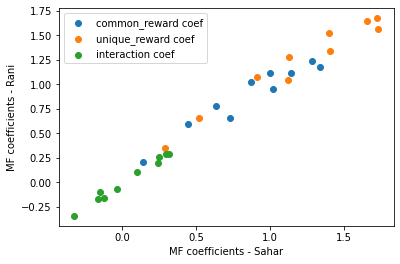

In [7]:
plt.scatter(sahar_mf['common_reward'], rani_mf['common_reward'], label='common_reward coef')
plt.scatter(sahar_mf['unique_reward'], rani_mf['unique_reward'], label='unique_reward coef')
plt.scatter(sahar_mf['interaction'], rani_mf['interaction'], label='interaction coef')
plt.legend()
plt.xlabel('MF coefficients - Sahar')
plt.ylabel('MF coefficients - Rani')

In [8]:
from analysis.simulation_results.MB_behaviour import extract_data_MB_glmfit

In [10]:
all_coefs = []
for beta in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]:
    data_path = 'analysis/simulation_results/data/MF/alpha{}beta{}/'.format(alpha, beta)
    _, __, ___, glm_result = extract_data_MB_glmfit(data_path)
    all_coefs.append(glm_result)

In [11]:
rani_mb = pd.DataFrame({
    'common_reward': [-0.4240, -0.5404, 0.3726, -0.0619, 0.2299, -0.2303, 0.2275, -0.2970, -0.8618, 0.4477],
    'reward_prob': [0.3828, 0.9672, 2.3111, 1.9623, 2.9057, 2.5084, 3.4598, 3.2005, 2.9361, 4.4487],
    'interaction': [1.0292, 1.1037, -0.8636, -0.0197, -0.4745, 0.3361, -0.4055, 0.4335, 1.5066, -0.9296]
})

In [12]:
sahar_mb = pd.DataFrame({
    'common_reward': [result.fe_mean[1] for result in all_coefs],
    'reward_prob': [result.fe_mean[2] for result in all_coefs],
    'interaction': [result.fe_mean[3] for result in all_coefs]
})

Text(0, 0.5, 'MB coefficients - Rani')

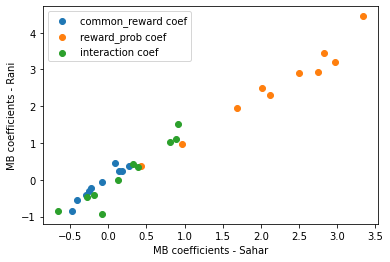

In [13]:
plt.scatter(sahar_mb['common_reward'], rani_mb['common_reward'], label='common_reward coef')
plt.scatter(sahar_mb['reward_prob'], rani_mb['reward_prob'], label='reward_prob coef')
plt.scatter(sahar_mb['interaction'], rani_mb['interaction'], label='interaction coef')
plt.legend()
plt.xlabel('MB coefficients - Sahar')
plt.ylabel('MB coefficients - Rani')